In [54]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [3]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [4]:
A = np.array([1, 3, 5])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [5]:
A.sum()

9

Simple Linear Regression

In [6]:
Boston = load_data("Boston")

In [7]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [8]:
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        ~/Documents/CS/CS543_ML/mlvenv/lib/python3.10/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is alig

array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <Axes: xlabel='rad', ylabel='zn'>,
        <Axes: x

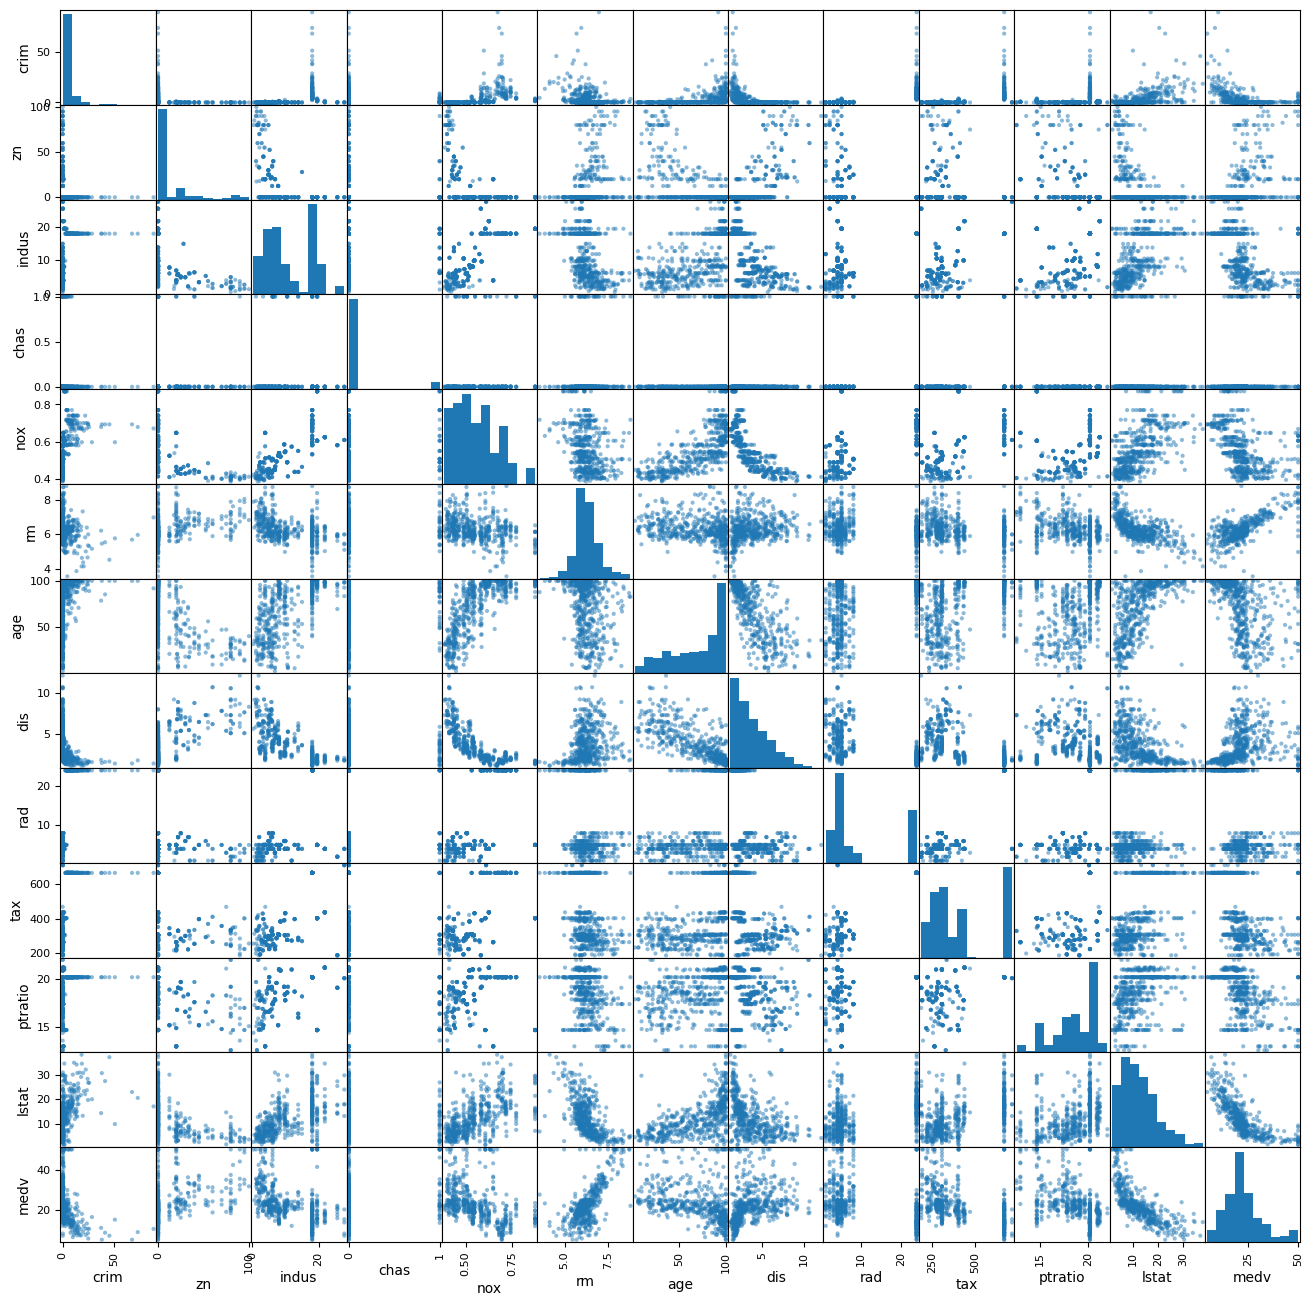

In [9]:
pd.plotting.scatter_matrix(Boston, figsize=(16,16))

In [11]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})
X[:10]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
5,1.0,5.21
6,1.0,12.43
7,1.0,19.15
8,1.0,29.93
9,1.0,17.10


In [12]:
y = Boston['medv']
model = sm.OLS(y,X)
results = model.fit()

In [15]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [19]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:10]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
5,1.0,5.21
6,1.0,12.43
7,1.0,19.15
8,1.0,29.93
9,1.0,17.10


In [21]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:10]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
5,1.0,5.21
6,1.0,12.43
7,1.0,19.15
8,1.0,29.93
9,1.0,17.10


In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           5.08e-88
Time:                        13:49:19   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [24]:
new_df = pd.DataFrame({'lstat':[5,10,15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [26]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [27]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [28]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [30]:
def abline(ax, b, m,  *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

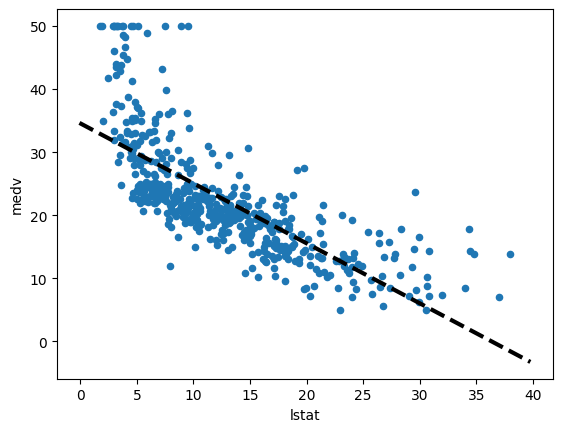

In [34]:
ax = Boston.plot.scatter('lstat','medv')
abline(ax, 
       results.params[0], 
       results.params[1],
       'k--',
       linewidth=3)

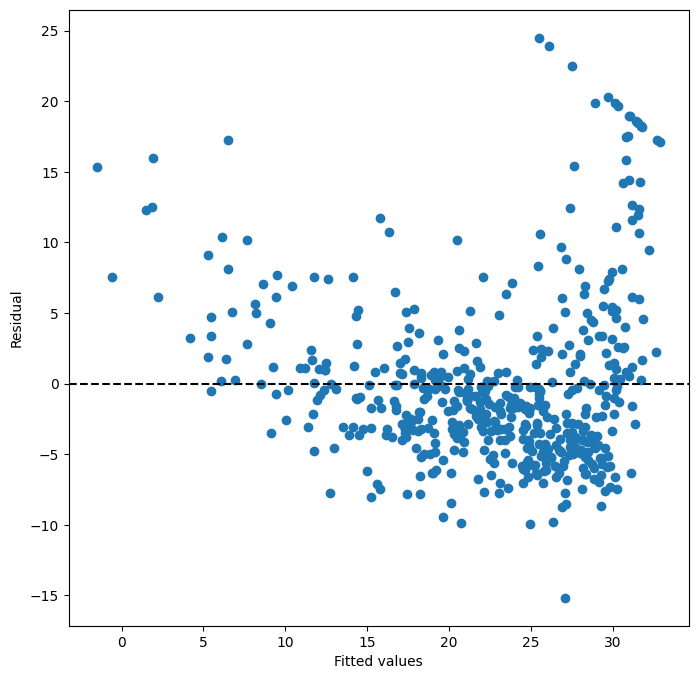

In [36]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

374

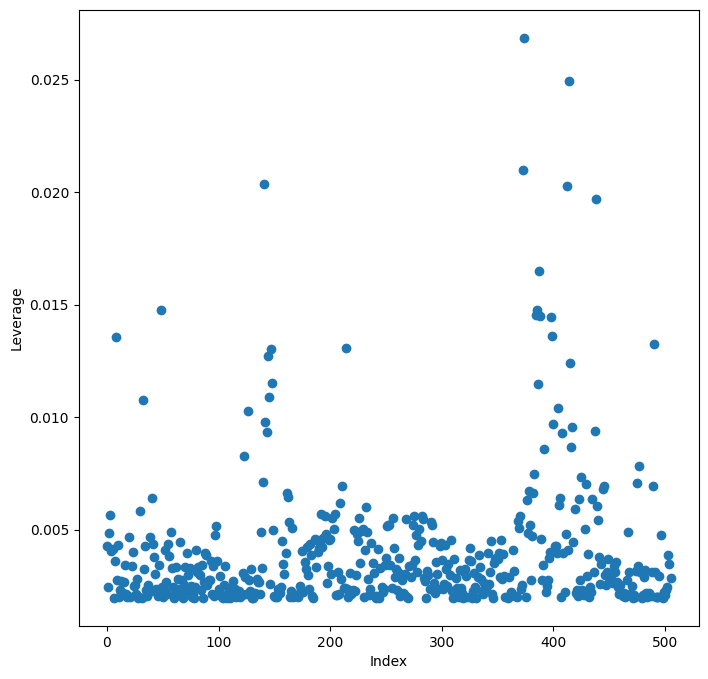

In [37]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [38]:
X = MS(['lstat','age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [39]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [40]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [41]:
minus_age = Boston.columns.drop(['medv','age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [42]:
vals = [VIF(X,i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
vif


,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [43]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

In [44]:
vals

[1.7674859154310116,
 2.2984589077358097,
 3.9871806307570994,
 1.0711677737584038,
 4.369092622844793,
 1.9125324374368873,
 3.0882320397311984,
 3.954036641628298,
 7.445300760069838,
 9.002157663471797,
 1.7970595931297797,
 2.8707765008417514]

In [45]:
X = MS(['lstat','age',('lstat','age')]).fit_transform(Boston)
model2 = sm.OLS(y,X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [46]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y,X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [47]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


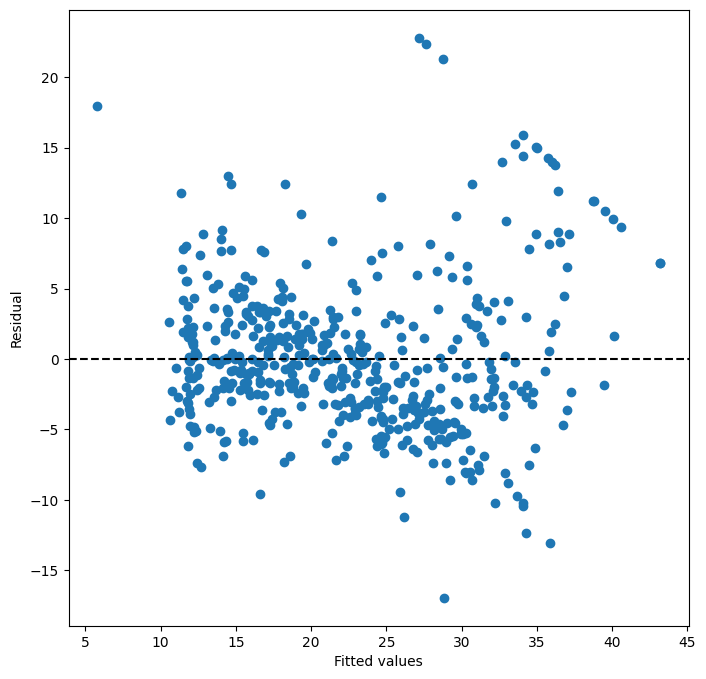

In [48]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [49]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [51]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats.Sales
final = allvars + [('Income','Advertising'),('Price','Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


# Applied Homework

In [52]:
auto = load_data('Auto')

In [53]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


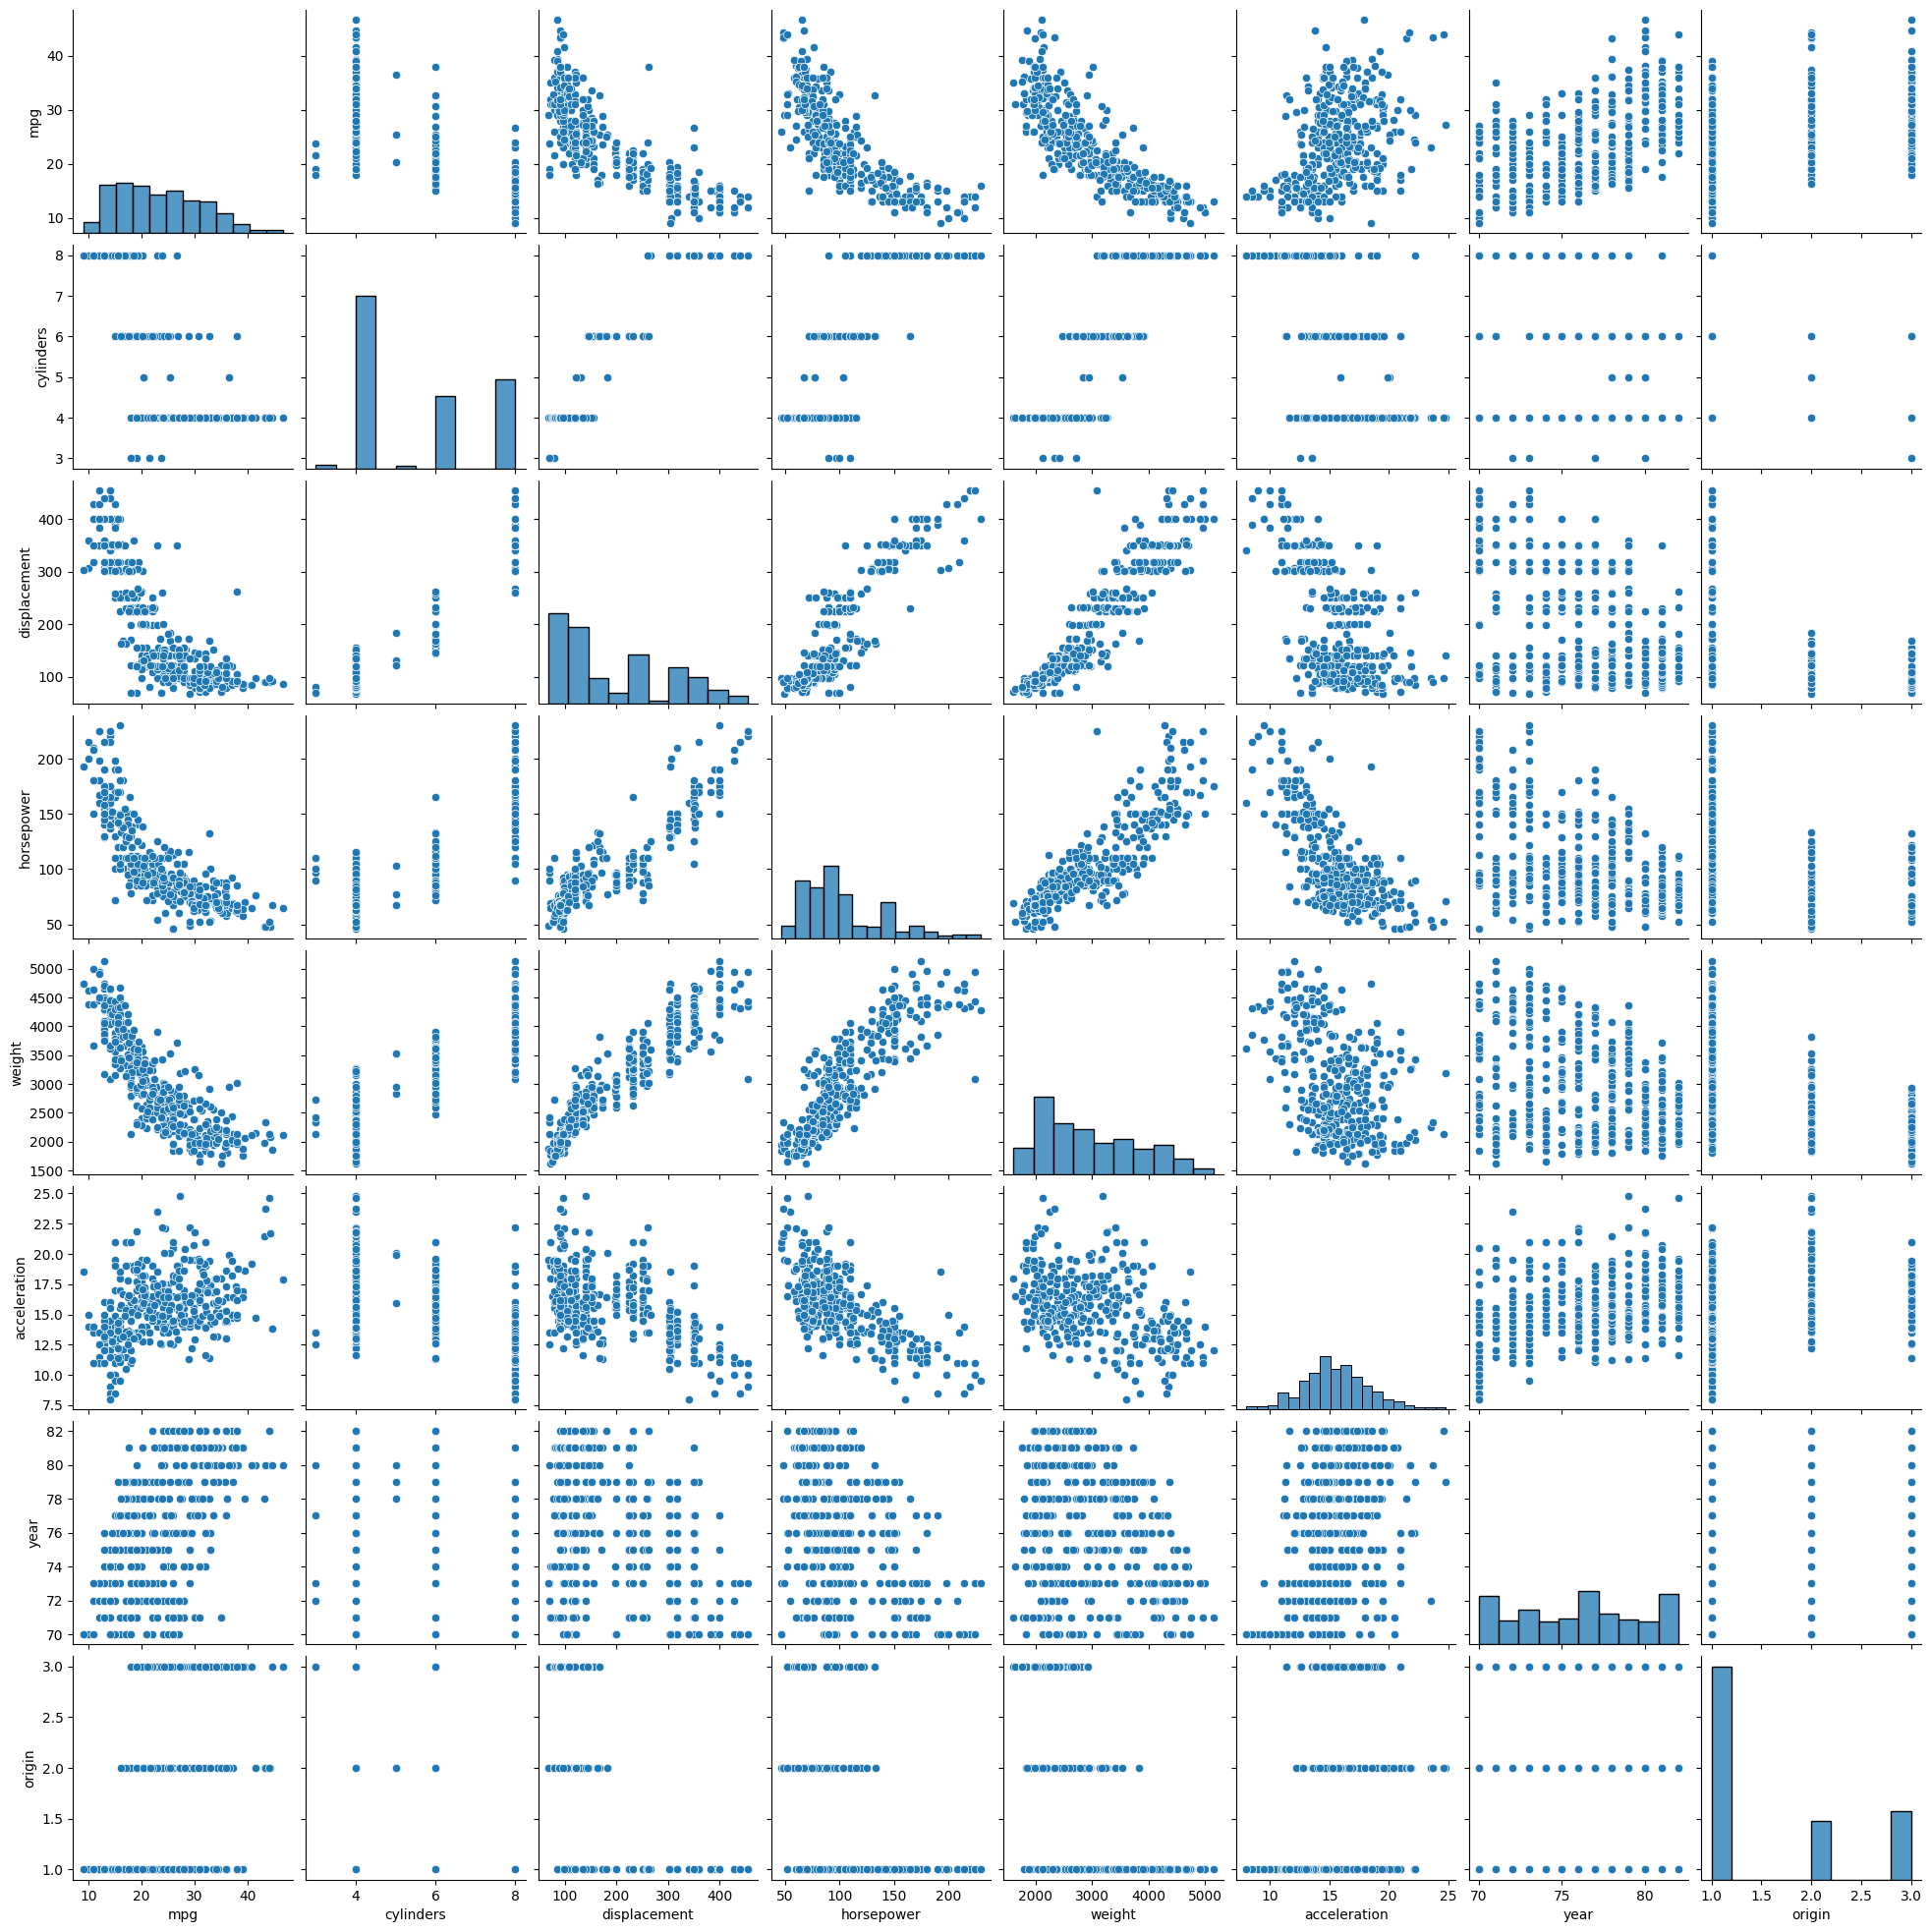

In [55]:
sns.pairplot(auto)

In [70]:
X = pd.DataFrame({'intercept':np.ones(auto.shape[0]),
                  'horsepower': auto.horsepower})
y = auto.mpg

In [71]:
model4 = sm.OLS(y, X)

In [72]:
results4 = model4.fit()

In [73]:
summarize(results4)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [80]:
design1 = MS(['horsepower'])
design1 = design1.fit(auto)
X1 = design1.transform(auto)
X1

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           7.03e-81
Time:                        19:46:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
new_df1 = pd.DataFrame({'horsepower': [98]})
newX1 = design1.transform(new_df1)
newX1

,intercept,horsepower
0,1.0,98


In [82]:
new_predictions1 = results4.get_prediction(newX1)
new_predictions1.predicted_mean

array([24.46707715])

In [83]:
new_predictions1.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

In [84]:
new_predictions1.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

#### (a)

#### i. Is there a relationship between the predictor and the response?


Yes, there is a negative relationship between mpg and horsepower.  As horsepower increases, mpg decreases. 

#### ii. How strong is the relationship between the predictor and the reponse?

The relationship has an $R^2$ value of 0.605 and an adjusted $R^2$ of 0.605.  This is not a strong relationship.

#### iii. Is the relationship between the predictor and the repsonse positive or negative?

The relationship between the predictor and the response if negative.

#### iiii. What is the predicted mpg associated with a horsepower of 98?  What are the associated 95% confidence and prediction intervals?

The predicted mpg with a horsepower of 98hp is 24.47mpg.  The 95% confidence interval is between 23.97 and 24.97mpg. The 95% prediction interval is between 14.81 and 34.12 mpg. 

#### (b)

#### Plot the response and the predictor in a new set of axes ax. Use the ax.aline() method function defined int he lab to display the least squares regression line.

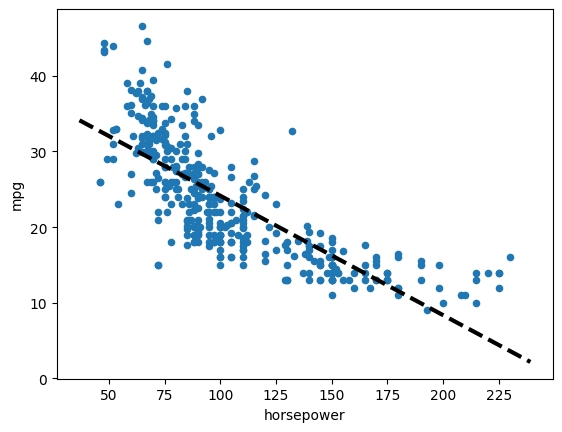

In [75]:
ax1 = auto.plot.scatter('horsepower','mpg')
abline(ax1, 
       results4.params[0], 
       results4.params[1],
       'k--',
       linewidth=3)

#### (c)

#### Produce some diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

The residual plot identifies a non linearity in the data, as the trend is "u shaped" and not straight.  Utilizing a nonlinear transformation would most likly result in a better performing model. 

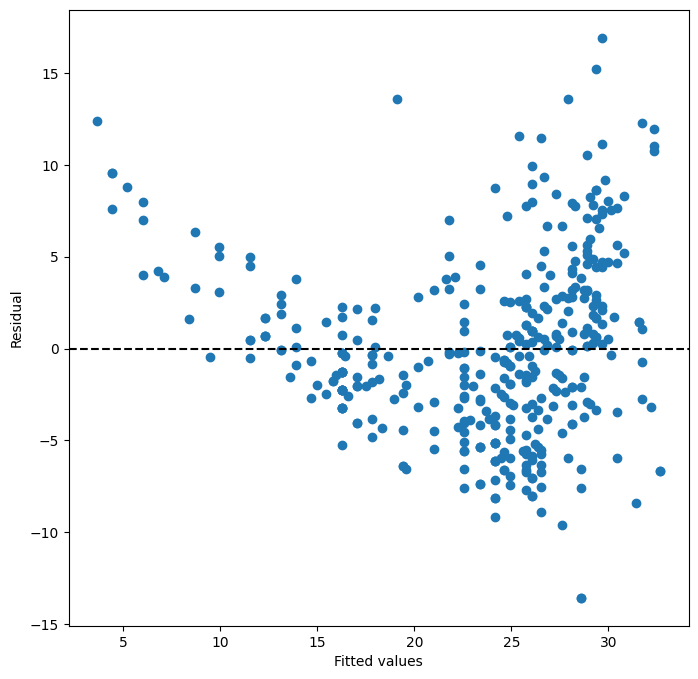

In [85]:
ax1 = subplots(figsize=(8,8))[1]
ax1.scatter(results4.fittedvalues, results4.resid)
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residual')
ax1.axhline(0, c='k', ls='--')

115

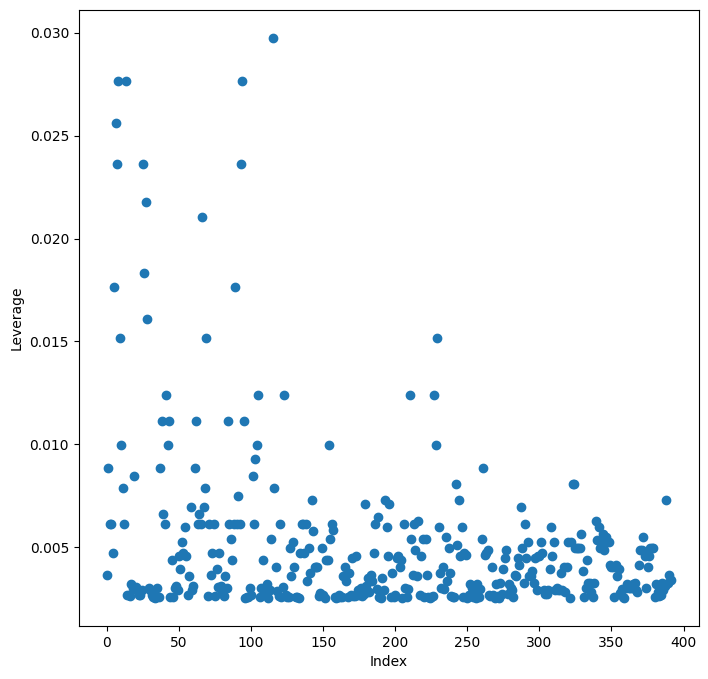

In [86]:
infl1 = results4.get_influence()
ax1 = subplots(figsize=(8,8))[1]
ax1.scatter(np.arange(X1.shape[0]), infl1.hat_matrix_diag)
ax1.set_xlabel('Index')
ax1.set_ylabel('Leverage')
np.argmax(infl1.hat_matrix_diag)